## Image Resizing

In [35]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

Height: 645<br>
Width: 1032

In [36]:
plain_image_path = "../../../Dataset/train/Plain/"
plain_dump_path = "../Dataset/Resized_Images_256/Plain/"

pothole_image_path = "../../../Dataset/train/Pothole/"
pothole_dump_path = "../Dataset/Resized_Images_256/Pothole/"
# final_size = (645, 1032)
final_size = (256, 256)

In [4]:
def resizeImage(image: np.ndarray, size: tuple) -> np.ndarray:
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

def extractFileName(fileName: str) -> str:
    return ('.'.join(fileName.split(".")[:-1]))

In [5]:
def resizeAndDump(readPath: str, WritePath: str):
    for file_name in os.listdir(readPath):
        file_path = readPath + file_name
        file_name_without_extension = extractFileName(file_name)
        try:
            img_arr = np.asarray(Image.open(file_path))
        except:
            print(file_path)
            continue
        resized_img_arr = resizeImage(img_arr, final_size)
        plt.imsave(f"{WritePath}{file_name_without_extension}.png", resized_img_arr)

In [6]:
resizeAndDump(plain_image_path, plain_dump_path)
resizeAndDump(pothole_image_path, pothole_dump_path)

print(len(os.listdir(plain_dump_path)))
print(len(os.listdir(pothole_dump_path)))

../../../Dataset/train/Plain/107.2019-9-4-Flood-Recovery-After-42.jpg


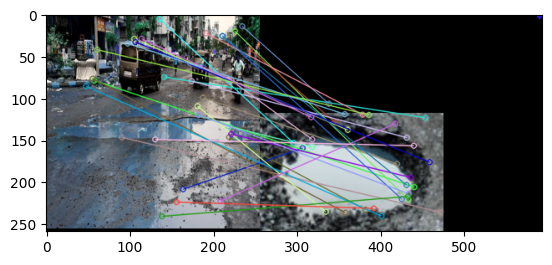

In [ ]:
target_path = "../Sample_Images/target.png"
image_path = "../Resized_Images/Pothole/101.pothole_ddcba8e4-a344-11e9-85f3-0f8400bbe260.png"

mainImg = cv2.imread(image_path, 1)
targetImg = cv2.imread(target_path, 1)

sift = cv2.SIFT_create()

mainKeypoints, mainDescriptors = sift.detectAndCompute(mainImg, None)
targetKeypoints, targetDescriptors = sift.detectAndCompute(targetImg, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(mainDescriptors, targetDescriptors)

matches = sorted(matches, key = lambda x: x.distance)

matched_img = cv2.drawMatches(mainImg, mainKeypoints, targetImg, targetKeypoints, matches[:30], mainImg, flags=2)
plt.imshow(matched_img)

## Bag of visual words implementation

Extract SIFT Descriptors: As you normally would, apply the SIFT algorithm to your image dataset to extract SIFT keypoints and descriptors.

Build a Visual Codebook: Create a visual codebook using k-means clustering on the original SIFT descriptors, as described in the previous responses. This step remains the same.

Dimensionality Reduction:

After building the codebook, you can apply dimensionality reduction to your SIFT descriptors. Here's how you can do it with PCA:

a. Combine all SIFT descriptors into a single matrix, where each row represents a descriptor.

b. Apply PCA to this descriptor matrix to reduce its dimensionality. PCA will yield a set of principal components (eigenvectors) and their associated eigenvalues.

c. Select a reduced dimensionality that retains a sufficient amount of variance (e.g., 95% of the variance). This choice depends on your specific application.

d. Transform your SIFT descriptors into the lower-dimensional space defined by the selected principal components.

Quantize Descriptors and Create Histograms:

With the reduced-dimensional SIFT descriptors, you can proceed to quantize them based on your visual codebook, as explained earlier. This step remains the same.
Training and Classification with k-NN:

Now, you can use these reduced-dimensional histograms of visual words as feature vectors for training and classification with k-NN.
Parameter Tuning:

Be aware that the choice of dimensionality reduction and the number of retained dimensions can impact the performance of your classification model. You may need to experiment with different reduction techniques and dimensions to find the optimal configuration for your specific dataset and classification task.

#### Extract Descriptor vectors from each image and store them

In [37]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [38]:
# extract sift features

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    key_points, descriptors = sift.detectAndCompute(image, None)
    return key_points, descriptors

In [39]:
pothole_processed = [(pothole_dump_path + pothole_path) for pothole_path in os.listdir(pothole_dump_path)]
plain_processed = [(plain_dump_path + plain_path) for plain_path in os.listdir(plain_dump_path)]

def extract_descriptor_data() -> pd.DataFrame:
    data = []

    for i in plain_processed:
        img_arr = cv2.imread(i, 0)
        keypoints, descriptor = extract_sift_features(img_arr)
        for i in descriptor:
            descriptorData = {"Vector": i, "Class": 0}
            data.append(descriptorData)

    for i in pothole_processed:
        img_arr = cv2.imread(i, 0)
        keypoints, descriptor = extract_sift_features(img_arr)
        for i in descriptor:
            descriptorData = {"Vector": i, "Class": 1}
            data.append(descriptorData)
    
    df = pd.DataFrame(data)
    return df

In [40]:
descriptor_df = extract_descriptor_data()

In [41]:
descriptor_df

,Vector,Class
0,"[6.0, 2.0, 1.0, 1.0, 40.0, 118.0, 5.0, 5.0, 90...",0
1,"[0.0, 12.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",0
2,"[42.0, 47.0, 39.0, 0.0, 0.0, 7.0, 23.0, 11.0, ...",0
3,"[2.0, 2.0, 5.0, 18.0, 34.0, 121.0, 86.0, 7.0, ...",0
4,"[91.0, 49.0, 10.0, 2.0, 5.0, 4.0, 2.0, 28.0, 4...",0
...,...,...
353556,"[8.0, 76.0, 52.0, 10.0, 16.0, 34.0, 6.0, 2.0, ...",1
353557,"[13.0, 17.0, 10.0, 9.0, 37.0, 9.0, 14.0, 29.0,...",1
353558,"[15.0, 23.0, 3.0, 0.0, 1.0, 1.0, 3.0, 4.0, 17....",1
353559,"[29.0, 60.0, 33.0, 39.0, 113.0, 113.0, 49.0, 1...",1


In [57]:
np.save("original_descriptors", descriptor_df["Vector"])

#### Decomposition of Descriptor Vectors using Principle Component Analysis

In [42]:
from sklearn.decomposition import PCA

<i>How Best n_components is selected for PCA - https://www.youtube.com/watch?v=xvfJXNGCQBM

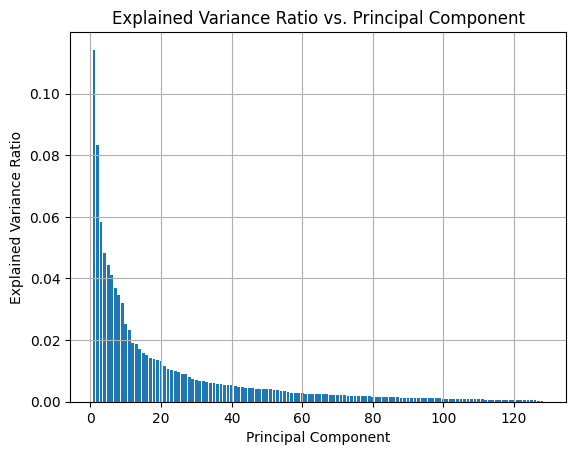

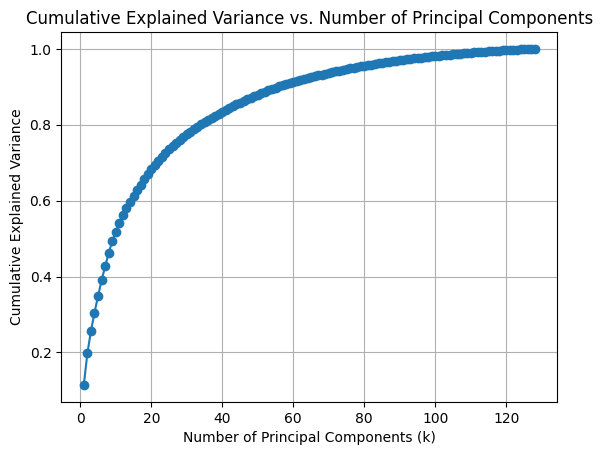

Optimal value of k: 77


In [43]:
# Assuming your descriptors are stored in a NumPy array 'descriptors' with shape (353561, 128).

# Create an instance of PCA
pca = PCA()

# Fit PCA to your descriptors
pca.fit(np.vstack(descriptor_df["Vector"]))

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Principal Component')
plt.grid(True)
plt.show()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

desired_explained_variance = 0.95

# Find the smallest k that achieves the desired explained variance
optimal_k = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1

print(f"Optimal value of k: {optimal_k}")

In [65]:
from sklearn.decomposition import PCA
import joblib

# Create a PCA instance with the optimal number of components (k)
pca = PCA(n_components=77)  # Replace 'optimal_k' with your chosen value of k

# Fit PCA to your descriptors
pca.fit(np.vstack(descriptor_df["Vector"]))
joblib.dump(pca, '../Models and Data/pca_77.joblib')
reduced_descriptors = pca.fit_transform(np.vstack(descriptor_df["Vector"]))

In [66]:
pca.components_

array([[ 0.05637115,  0.04704767,  0.02051413, ...,  0.02943498,
         0.01998617, -0.00025356],
       [ 0.05060935, -0.0211637 , -0.06645229, ..., -0.04030776,
        -0.05404168, -0.0313092 ],
       [-0.02995555, -0.09573181, -0.08119875, ...,  0.04737286,
        -0.01424558, -0.02964855],
       ...,
       [ 0.17069608,  0.01627965,  0.12724558, ..., -0.17649695,
        -0.09183592,  0.07742168],
       [ 0.050363  , -0.09376459,  0.07715186, ..., -0.09086978,
         0.10451639,  0.01590462],
       [-0.14365368, -0.06553877,  0.01340346, ...,  0.21002375,
        -0.05221436, -0.19617738]], dtype=float32)

reduced descriptors now have a shape of <b>1x77<b/>

In [56]:
reduced_descriptors

array([[-174.04555   ,  135.85622   ,   18.159105  , ...,    4.425546  ,
          12.266347  ,   10.666224  ],
       [ -77.06565   ,   87.088615  , -117.70224   , ...,   -6.6990013 ,
          -4.308623  ,   -8.256253  ],
       [  74.565765  ,   29.678923  , -104.200066  , ...,    6.084652  ,
         -13.740128  ,   18.932285  ],
       ...,
       [ 118.139786  , -111.74195   ,  -45.804634  , ...,   39.819267  ,
           0.19235319,   -2.8544567 ],
       [ 142.22832   , -133.65761   ,   59.28308   , ...,  -48.395058  ,
           4.466133  ,    8.235006  ],
       [ -46.017643  ,  -82.02264   ,   46.579964  , ...,   24.675749  ,
          25.230312  ,   12.097278  ]], dtype=float32)

In [13]:
np.save("reduced_descriptors", reduced_descriptors)

#### Clustering Reduced Descriptors into groups of descriptors using K-Means

we need more clusters to group descriptors into visual words so we can find the occurences of each visualword in the images

So, we try to first find the optimal number of clusters we can make using Elbow method taking Within-Cluster_som of Squared as the metric for estimating optimal K value

<b>Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters to each data point. Typically, the Euclidean distance metric is used. </b>
<br>
<li>Distortion = 1/n * Σ(distance(point, centroid)^2)</li>
<br>

<b>Inertia: It is the sum of the squared distances of samples to their closest cluster center.</b>
<br>


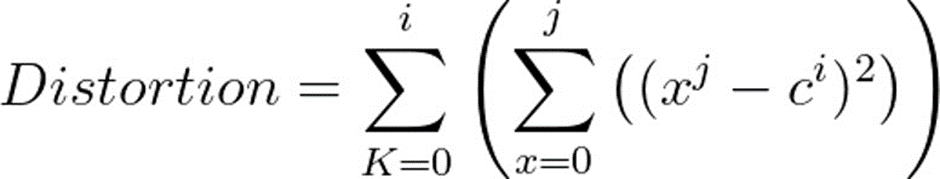

In [46]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np
import json
import pickle

In [ ]:
inertias = []
mapping1 = {}
mapping2 = {}
K = range(5, 450, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(reduced_descriptors)
    pickle.dump(kmeanModel, open(f"../Models and Data/Kmeans_Cluster_SIFT/kmeans_{k}.pickle", "wb"))

    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(reduced_descriptors, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / reduced_descriptors.shape[0]
    mapping2[k] = kmeanModel.inertia_
    if(k%15 == 0):   
        print(k)

In [121]:
# cluster_data = np.array([distortions, inertias, mapping1, mapping2])
cluster_data = {"distortions": distortions, "intertias": inertias, "mapping1":mapping1, "mapping2":mapping2}
# np.savetxt("cluster_data.txt", cluster_data, delimiter=",")
# cluster_data
with open("cluster_performance_results.json", "w") as f:
    json.dump(cluster_data, f, indent = 6)

In [ ]:
import numpy as np

distortion_values = {
    5: 325.3059155903128,
    15: 303.3715564982509,
    25: 293.83366249312525,
    35: 287.9289211575892,
    45: 284.0373785143893,
    55: 280.77180760129255,
    65: 278.1524419200555,
    75: 275.9363460493167,
    85: 273.9601565708158,
    95: 272.2120263371885,
    105: 270.7346900532742,
    115: 269.3407931708346,
    125: 268.124040195971,
    135: 267.00923309268154,
    145: 266.007101131056,
    155: 265.08230157108625,
    165: 264.15133943854994,
    175: 263.22737366130235,
    185: 262.6040843911867,
    195: 261.8179491839445,
    205: 261.12255893839307,
    215: 260.4234667033827,
    225: 259.8507893578001,
    235: 259.25469445541484,
    245: 258.68546499230405
}

# Convert dictionary to lists
k_values, distortions = zip(*distortion_values.items())

print(len(distortions[3:]))
# Calculate the second derivative of the distortions
second_derivative = np.gradient(np.gradient(distortions[3:]))

# Find the index where the second derivative is maximum
elbow_index = np.argmax(second_derivative)

# Get the optimal k value
optimal_k = k_values[elbow_index]

print(f"The optimal value of k is: {optimal_k}")


22
The optimal value of k is: 25


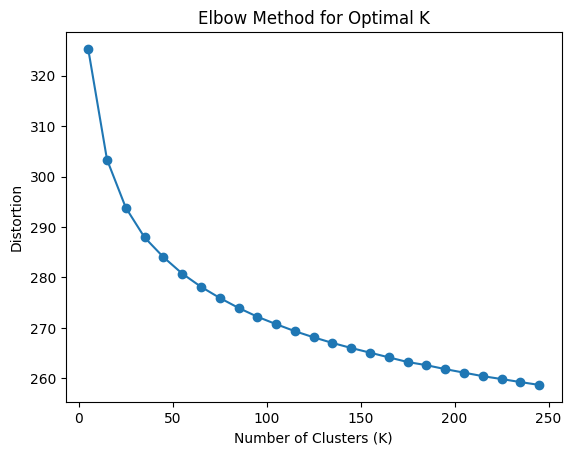

In [ ]:
import matplotlib.pyplot as plt

k_values = list(distortion_values.keys())
distortion_values = list(distortion_values.values())

plt.plot(k_values, distortion_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


#### Labelling Reduced Descriptors

for now, we will use with model where clusters size = 115 for labelling our reduced descriptor vectors

In [14]:
import pickle

In [19]:
reduced_descriptors.shape

(353561, 77)

In [10]:
reduced_descriptor_df = pd.DataFrame([[x] for x in reduced_descriptors], columns=["Desc_Vectors"])

now we predict our descriptor classes and add labels to df

In [13]:
cluster_size = 5
kmeans_model_205 = pickle.load(open("../Models and Data/Kmeans_Cluster_SIFT/kmeans_5.pickle", "rb"))
predictions = kmeans_model_205.predict(reduced_descriptors)

# update labels
reduced_descriptor_df["Labels"] = [str(x) for x in predictions]
np.unique(predictions)

array([0, 1, 2, 3, 4])

In [165]:
def labelDescriptors(reduced_descriptors: np.ndarray, KMeansModel: KMeans) -> pd.DataFrame:
    reduced_descriptor_df = pd.DataFrame([[x] for x in reduced_descriptors], columns=["Desc_Vectors"])
    predictions = KMeansModel.predict(reduced_descriptors)

    # update labels
    reduced_descriptor_df["Labels"] = [str(x) for x in predictions]
    # np.unique(predictions)
    return reduced_descriptor_df

there are a total of 115 classes

In [22]:
reduced_descriptor_df["Labels"].unique()

array(['89', '120', '176', '147', '128', '31', '27', '28', '170', '114',
       '203', '102', '81', '26', '92', '156', '137', '143', '83', '106',
       '2', '200', '188', '111', '175', '50', '116', '174', '47', '42',
       '63', '8', '196', '150', '53', '187', '138', '165', '153', '46',
       '21', '72', '10', '146', '54', '71', '93', '94', '166', '189',
       '23', '100', '151', '190', '154', '76', '126', '33', '130', '55',
       '38', '127', '109', '145', '36', '24', '131', '177', '68', '172',
       '129', '136', '157', '4', '73', '163', '160', '39', '117', '52',
       '110', '5', '9', '115', '16', '1', '79', '112', '61', '30', '181',
       '43', '95', '29', '40', '84', '164', '107', '70', '125', '65',
       '199', '22', '161', '58', '17', '194', '185', '37', '69', '18',
       '35', '186', '122', '179', '159', '82', '41', '158', '105', '14',
       '193', '62', '15', '134', '66', '180', '113', '123', '90', '171',
       '132', '88', '198', '98', '148', '6', '201', '162', '8

#### generating histograms for training images without TF-IDF vectorization and saving it

In [23]:
x = np.array([1,2,3,4, 5, 6, 7, 8, 9])
y = np.array([0,0,0,0,0,5,5,5,10])
y[:len(x)] = np.logical_or(x,y[:len(x)]) * x
y

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
from sklearn.cluster import KMeans

pothole_processed = [(pothole_dump_path + pothole_path) for pothole_path in os.listdir(pothole_dump_path)]
plain_processed = [(plain_dump_path + plain_path) for plain_path in os.listdir(plain_dump_path)]

def generateDescriptorHistograms(paths: list, labels: list, KMeansModel: KMeans, cluster_size: int) -> pd.DataFrame:
    pca = PCA(n_components=77) 
    data = []
    _max = 0

    # process plain images
    for i in range(len(paths)):
        for image_path in paths[i]:
            # read image array grayscale color space
            img_arr = cv2.imread(image_path, 0)

            # extract descriptors from image
            keypoints, descriptor = extract_sift_features(img_arr)

            if(descriptor.shape[0]) < 77:
                # print(image_path)
                continue

            # do pca on descriptors
            reduced_descriptors = pca.fit_transform(descriptor)

            # generate image descriptor classes
            class_labels = KMeansModel.predict(reduced_descriptors)

            # initialize and populate histogram with 115 descriptor classes
            histogram = np.zeros(cluster_size, dtype=int)
            histogram_cropped = np.bincount(class_labels)
            histogram[:len(histogram_cropped)] = np.logical_or(histogram_cropped,histogram[:len(histogram_cropped)]) * histogram_cropped

            # store data
            data.append({"Path":image_path, "Desc_Histogram":histogram, "Class":labels[i]})
    
    df = pd.DataFrame(data)
    return df

In [49]:
model = pickle.load(open("../Models and Data/Kmeans_Cluster_SIFT/kmeans_5.pickle", "rb"))
Image_Descriptor_Histogram = generateDescriptorHistograms(paths=[pothole_processed, plain_processed], labels=['Pothole','Plain'], KMeansModel=model, cluster_size=5)

In [50]:
Image_Descriptor_Histogram

,Path,Desc_Histogram,Class
0,../Dataset/Resized_Images_256/Pothole/1.png,"[122, 165, 100, 147, 74]",Pothole
1,../Dataset/Resized_Images_256/Pothole/1.Pothol...,"[77, 98, 65, 125, 65]",Pothole
2,../Dataset/Resized_Images_256/Pothole/10.png,"[53, 58, 41, 53, 33]",Pothole
3,../Dataset/Resized_Images_256/Pothole/10._1066...,"[131, 154, 84, 137, 112]",Pothole
4,../Dataset/Resized_Images_256/Pothole/100.0_Po...,"[110, 254, 172, 219, 191]",Pothole
...,...,...,...
710,../Dataset/Resized_Images_256/Plain/93.son2132...,"[47, 50, 42, 45, 32]",Plain
711,../Dataset/Resized_Images_256/Plain/94.iStock-...,"[169, 233, 182, 226, 112]",Plain
712,../Dataset/Resized_Images_256/Plain/95.connema...,"[52, 80, 44, 53, 46]",Plain
713,../Dataset/Resized_Images_256/Plain/96.capture...,"[106, 119, 95, 95, 94]",Plain


In [58]:
Image_Descriptor_Histogram.shape

(715, 3)

In [59]:
Image_Descriptor_Histogram["Desc_Histogram"][0]

array([101, 145, 165,  76, 121])

In [13]:
Image_Descriptor_Histogram.to_pickle('image_descriptor_vector_histograms.pkl')

## Training Models on extracted features

In [14]:
training_df = pd.read_pickle("image_descriptor_vector_histograms.pkl")
training_df.head()

,Path,Desc_Histogram,Class
0,../Dataset/Resized_Images_256/Pothole/1.png,"[122, 165, 100, 146, 75]",Pothole
1,../Dataset/Resized_Images_256/Pothole/1.Pothol...,"[77, 98, 65, 125, 65]",Pothole
2,../Dataset/Resized_Images_256/Pothole/10.png,"[53, 58, 41, 53, 33]",Pothole
3,../Dataset/Resized_Images_256/Pothole/10._1066...,"[131, 154, 84, 140, 109]",Pothole
4,../Dataset/Resized_Images_256/Pothole/100.0_Po...,"[110, 254, 172, 218, 192]",Pothole


In [62]:
training_df["Desc_Histogram"][0].shape

(5,)

#### K-Nearest-Neighboors based Classifier

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [94]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Columns: 'image_path', 'features', 'labels'

# Load the data and preprocess if needed
# For example, you might need to load images from 'image_path' and convert them to features

X = np.vstack(training_df['Desc_Histogram'].values)  # Stack arrays into a 2D array

# Extract labels
y = training_df['Class'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': list(range(1, 75)),  # Adjust based on your preference
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
}

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid, cv=2, scoring="accuracy")  # 5-fold cross-validation
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_knn.best_params_)

# Predictions on the test set
y_pred = grid_search_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'algorithm': 'brute', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
Accuracy on Test Set: 0.6853146853146853


In [218]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}


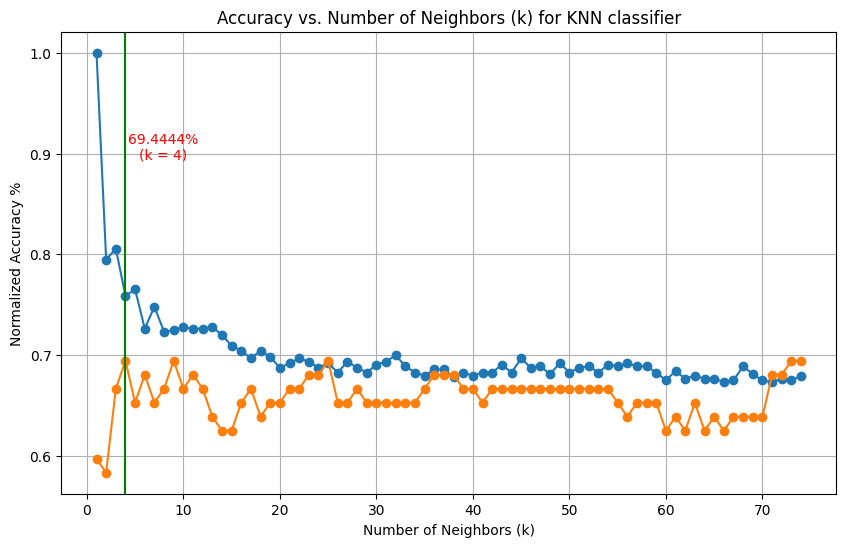

In [36]:
k_values = list(range(1, 75))  # Define a range of k values to test
train_accuracy_scores = []  # To store train accuracy scores for different k values
test_accuracy_scores = []  # To store test accuracy scores for different k values
model_configs = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    model_configs.append(knn_classifier.get_params())
    y_pred_train = knn_classifier.predict(X_train)
    y_pred_test = knn_classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy_scores, marker='o', linestyle='-')
plt.plot(k_values, test_accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k) for KNN classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Normalized Accuracy %')

# Find the index and value of the maximum test_score
max_test_score_index = test_accuracy_scores.index(max(test_accuracy_scores))
max_test_score = max(test_accuracy_scores)
min_test_score = min(test_accuracy_scores)
perc_padding = abs(max_test_score - min_test_score) * 0.12 * 0

# plt.ylim(min_test_score - perc_padding, max_test_score + perc_padding)

# point out the maximum test accuracy with dot
# plt.scatter(k_values[max_test_score_index] + 2, max_test_score - 0.04, color='red', marker='*', s=120)
plt.text(k_values[max_test_score_index] + 3.9, max_test_score + 0.2, f'{round(max_test_score * 100, 4)}%\n(k = {k_values[max_test_score_index]})', ha='center', color='red')
plt.axvline(x = k_values[max_test_score_index], color="green")
print(model_configs[max_test_score_index])


plt.grid(True)
plt.show()

In [21]:
X = np.vstack(training_df['Desc_Histogram'].values)  # Stack arrays into a 2D array

# Extract labels
y = training_df['Class'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
def KNN_best_params(X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray):
    # Create KNN classifier
    knn = KNeighborsClassifier()

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_neighbors': list(range(1, 75)),  # Adjust based on your preference
        'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
        'p': [1, 2],  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")  # 5-fold cross-validation
    grid_search_knn.fit(X_train, y_train)

    y_pred_train = grid_search_knn.predict(X_train)
    y_pred_test = grid_search_knn.predict(X_test)

    best_model_config = grid_search_knn.best_params_
    max_train_score = accuracy_score(y_train, y_pred_train)
    max_test_score = accuracy_score(y_test, y_pred_test)

    return [max_train_score, max_test_score, best_model_config]

In [96]:
KNN_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

[1.0,
 0.6853146853146853,
 {'algorithm': 'brute', 'n_neighbors': 30, 'p': 1, 'weights': 'distance'}]

#### SVM based Classifier

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Columns: 'image_path', 'features', 'labels'

# Load the data and preprocess if needed
# For example, you might need to load images from 'image_path' and convert them to features

X = np.vstack(training_df['Desc_Histogram'].values)  # Stack arrays into a 2D array

# Extract labels
y = training_df['Class'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create SVM classifier
svm = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring="accuracy")  # 2-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions on the test set
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on Train Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


Best Hyperparameters: {'C': 1.0, 'kernel': 'rbf'}
Accuracy on Train Set: 0.6920684292379471
Accuracy on Test Set: 0.6805555555555556


In [100]:
svm_model = SVC(gamma="auto")
svm_model.fit(X_train, y_train)

SVC(gamma='auto')

In [108]:
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# svm_model.score(y_test, y_pred_test)
# svm_model.score(y_train, y_pred_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_accuracy_scores.append(train_accuracy)
test_accuracy_scores.append(test_accuracy)
print(train_accuracy, test_accuracy)

0.9912587412587412 0.6293706293706294


In [32]:
def SVM_best_params(X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray):

    svm = SVC()
    param_grid = {
        'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Kernel type
    #     'C': [0.1, 1, 10, 100],  # Regularization parameter
    #     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Choice of kernel
        # 'gamma': [0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        # 'degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly')
        # 'coef0': [0.0, 1.0, 2.0],  # Independent term in the kernel function (only for 'poly' and 'sigmoid')
    }

    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")  # 2-fold cross-validation
    grid_search.fit(X_train, y_train)

    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)

    best_model_config = grid_search.best_params_
    max_train_score = accuracy_score(y_train, y_pred_train)
    max_test_score = accuracy_score(y_test, y_pred_test)

    return [max_train_score, max_test_score, best_model_config]

In [42]:
print(SVM_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))

[0.6920684292379471, 0.6805555555555556, {'C': 1.0, 'kernel': 'rbf'}]


saving the tuned parameters

In [289]:
svm_hyper_params = grid_search.best_params_
	
with open("svm.json", "w") as outfile:
	json.dump(svm_hyper_params, outfile)


In [296]:
knn_hyper_params = grid_search_knn.best_params_
	
with open("knn.json", "w") as outfile:
	json.dump(knn_hyper_params, outfile)


#### KNN and SVM together 

In [25]:
X = np.vstack(training_df['Desc_Histogram'].values)
y = training_df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(KNN_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))
print(SVM_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))

## Performing TF-IDF vectorization on extracted Image Descriptor Histograms

In [76]:
Image_Descriptor_Histogram["Desc_Histogram"][0]

array([101, 145, 165,  76, 121])

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix

In [20]:
def histogram_arr_to_tfidf(arr: np.ndarray) -> np.ndarray:
    # Assuming your matrix is named histograms_matrix
    # Convert it to a sparse matrix if it's not already sparse
    descriptor_histogram_array = arr.to_numpy()
    # print(type(descriptor_histogram_array[0]), descriptor_histogram_array.shape)
    descriptor_histogram_array = np.vstack(descriptor_histogram_array)
    sparse_histograms_matrix = csr_matrix(descriptor_histogram_array)

    # Create a TfidfTransformer instance
    tfidf_transformer = TfidfTransformer()

    # Fit and transform your matrix using TfidfTransformer
    tfidf_matrix = tfidf_transformer.fit_transform(sparse_histograms_matrix)

    # Now, tfidf_matrix contains the TF-IDF values for each descriptor in each image
    return tfidf_matrix

In [78]:
tfidf_matrix = histogram_arr_to_tfidf(Image_Descriptor_Histogram["Desc_Histogram"])

## Training and testing Models on TF-IDF features

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
tfidf_matrix = histogram_arr_to_tfidf(Image_Descriptor_Histogram["Desc_Histogram"])

In [153]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Columns: 'image_path', 'features', 'labels'

# Load the data and preprocess if needed
# For example, you might need to load images from 'image_path' and convert them to features

X = tfidf_matrix  # Stack arrays into a 2D array

# Extract labels
y = training_df['Class'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 200, 5),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy")  # 5-fold cross-validation
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search_knn.best_params_)

# Predictions on the test set
y_pred = grid_search_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
Accuracy on Test Set: 0.6223776223776224


In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# Assuming your dataset is in a DataFrame called 'df'
# Columns: 'image_path', 'features', 'labels'

# Load the data and preprocess if needed
# For example, you might need to load images from 'image_path' and convert them to features

X = tfidf_matrix  # Stack arrays into a 2D array

# Extract labels
y = training_df['Class'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create SVM classifier
svm = SVC()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=2, scoring="accuracy")  # 2-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions on the test set
y_pred_train = grid_search.predict(X_train)
y_pred_test = grid_search.predict(X_test)

# Calculate accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on Train Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)


Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy on Train Set: 0.6065318818040435
Accuracy on Test Set: 0.7083333333333334


In [81]:
Vectors = tfidf_matrix
Labels = training_df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(Vectors, Labels, test_size=0.1, random_state=42)

In [85]:
print(KNN_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))
print(SVM_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test))

[1.0, 0.7361111111111112, {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 60, 'p': 2, 'weights': 'uniform'}]
[0.5800933125972006, 0.6388888888888888, {'C': 7, 'gamma': 0.1, 'kernel': 'rbf'}]


## Training and testing Models on TF-IDF features for all K-Means Clustering Cluster sizes

loading the reduced descriptors

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix
import json

In [1]:
reduced_descriptors = np.load("./reduced_descriptors.npy")

NameError: name 'np' is not defined

In [33]:
def calculatePerformanceData():
    # paths for kmeans model retieval
    model_paths = [(f"../Models and Data/Kmeans_Cluster_SIFT/kmeans_{i}.pickle") for i in list(range(115, 700, 10))]

    # storage class that will contain ALL performance data that will be dumped in the end
    sift_classifier_performance_outputs = []


    # for all generated kmeans cluster models
    for path in model_paths:
        
        # Initialization ============================================================================================================
        
        performance_model = {
            "cluster_size":0,
            "KNN_Acc_Hist":{"Accuracy_train":0, "Accuracy_test":0, "Config":{}},
            "SVM_Acc_Hist":{"Accuracy_train":0, "Accuracy_test":0, "Config":{}},
            "KNN_Acc_TFIDF":{"Accuracy_train":0, "Accuracy_test":0, "Config":{}},
            "SVM_Acc_TFIDF":{"Accuracy_train":0, "Accuracy_test":0, "Config":{}},
        }
        
        # calculate and store cluster size
        cluster_size = int(path.split(".")[-2].split("_")[-1])
        print(f"\n\n\n!--- Current Cluster Size is {cluster_size} ---!")
        performance_model["cluster_size"] = cluster_size

        
        
        # Pre - Processing Histogram ============================================================================================================
        
        # load model and Label SIFT Descriptor Classes
        model = pickle.load(open(path, "rb"))

        # load image paths for generating descriptor histograms
        pothole_processed = [(pothole_dump_path + pothole_path) for pothole_path in os.listdir(pothole_dump_path)]
        plain_processed = [(plain_dump_path + plain_path) for plain_path in os.listdir(plain_dump_path)]

        # Generate Histogram Dataframe with labels (pothole or plain)
        print("!--- Starting Generatiion of Histogram Data for all images ---!")
        Image_Descriptor_Histogram = generateDescriptorHistograms(paths=[pothole_processed, plain_processed], labels=['Pothole','Plain'], KMeansModel=model, cluster_size=cluster_size)
        print("!--- Finished Generating Histogram Data for all images ---!")

        
        
        # Training Histogram Data ============================================================================================================
        
        # split dataset and train without TFIDF Vectorization
        Vectors = np.vstack(Image_Descriptor_Histogram['Desc_Histogram'].values)
        Labels = Image_Descriptor_Histogram['Class'].values
        X_train, X_test, y_train, y_test = train_test_split(Vectors, Labels, test_size=0.2, random_state=42)

        # KNN Classifier Training ------------------------------------------------------------------------------------------------
        print("!--- Starting KNN Classification for Hist Data ---!")
        max_train_score, max_test_score, best_model_config = KNN_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

        # store values
        performance_model["KNN_Acc_Hist"] = {"Accuracy_train":max_train_score, "Accuracy_test":max_test_score, "Config":best_model_config}

        ############################ --------------------------- ############################ --------------------------- ############################

        # SVM Classifier Training ------------------------------------------------------------------------------------------------
        print("!--- Starting SVM Classification for Hist Data ---!")
        max_train_score, max_test_score, best_model_config = SVM_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

        # store values
        performance_model["SVM_Acc_Hist"] = {"Accuracy_train":max_train_score, "Accuracy_test":max_test_score, "Config":best_model_config}



        # Pre - Processing TF-IDF ============================================================================================================
        print("!--- Performing TFIDF Vectorization ---!")
        tfidf_matrix = histogram_arr_to_tfidf(Image_Descriptor_Histogram["Desc_Histogram"])




        # Training TFIDF Processed Data ============================================================================================================
        
        # split dataset and train with TFIDF Vectorization
        Vectors = tfidf_matrix
        Labels = Image_Descriptor_Histogram['Class'].values
        X_train, X_test, y_train, y_test = train_test_split(Vectors, Labels, test_size=0.2, random_state=42)

        # KNN Classifier Training ------------------------------------------------------------------------------------------------
        print("!--- Starting KNN Classification for TFIDF Data ---!")
        max_train_score, max_test_score, best_model_config = KNN_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

        # store values
        performance_model["KNN_Acc_TFIDF"] = {"Accuracy_train":max_train_score, "Accuracy_test":max_test_score, "Config":best_model_config}

        ############################ --------------------------- ############################ --------------------------- ############################

        # SVM Classifier Training ------------------------------------------------------------------------------------------------
        print("!--- Starting SVM Classification for TFIDF Data ---!")
        max_train_score, max_test_score, best_model_config = SVM_best_params(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

        # store values
        performance_model["SVM_Acc_TFIDF"] = {"Accuracy_train":max_train_score, "Accuracy_test":max_test_score, "Config":best_model_config}


        # adding single cluster performance data to storage and also dumping it
        sift_classifier_performance_outputs.append(performance_model)
        with open(f"../Models and Data/PerformanceDump/performanceData_clusterSize{cluster_size}.json", "w") as f:
            json.dump(performance_model, f)
        
    # dumping ALL performance data
    with open(f"../Models and Data/PerformanceDump/performanceData.json", "w") as f:
            json.dump(sift_classifier_performance_outputs, f, indent="\t")

In [4]:
calculatePerformanceData()

NameError: name 'calculatePerformanceData' is not defined

## Visualizing Performances

In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
performance_dump_paths = [f"../Models and Data/PerformanceDump/performanceData_clusterSize{i}.json" for i in range(5, 285, 10)]
performance_data = []
for i in performance_dump_paths:
    with open(i) as f:
        performance_data.append(json.loads(f.read()))

In [3]:
performance_data[0]

{'cluster_size': 5,
 'KNN_Acc_Hist': {'Accuracy_train': 1.0,
  'Accuracy_test': 0.6783216783216783,
  'Config': {'algorithm': 'ball_tree',
   'n_neighbors': 53,
   'p': 1,
   'weights': 'distance'}},
 'SVM_Acc_Hist': {'Accuracy_train': 0.6765734265734266,
  'Accuracy_test': 0.7132867132867133,
  'Config': {'C': 1.0, 'kernel': 'rbf'}},
 'KNN_Acc_TFIDF': {'Accuracy_train': 1.0,
  'Accuracy_test': 0.6643356643356644,
  'Config': {'algorithm': 'auto',
   'n_neighbors': 66,
   'p': 1,
   'weights': 'distance'}},
 'SVM_Acc_TFIDF': {'Accuracy_train': 0.6206293706293706,
  'Accuracy_test': 0.6923076923076923,
  'Config': {'C': 1.0, 'kernel': 'rbf'}}}

In [21]:
performance_cluster_size = []

KNN_Hist_Acc_Train = []
KNN_Hist_Acc_Test = []
SVM_Hist_Acc_Train = []
SVM_Hist_Acc_Test = []

KNN_TFIDF_Acc_Train = []
KNN_TFIDF_Acc_Test = []
SVM_TFIDF_Acc_Train = []
SVM_TFIDF_Acc_Test = []

for i in performance_data:
    performance_cluster_size.append(i["cluster_size"])
    
    KNN_Hist_Acc_Train.append(i["KNN_Acc_Hist"]["Accuracy_train"])
    KNN_Hist_Acc_Test.append(i["KNN_Acc_Hist"]["Accuracy_test"])

    SVM_Hist_Acc_Train.append(i["SVM_Acc_Hist"]["Accuracy_train"])
    SVM_Hist_Acc_Test.append(i["SVM_Acc_Hist"]["Accuracy_test"])

    KNN_TFIDF_Acc_Train.append(i["KNN_Acc_TFIDF"]["Accuracy_train"])
    KNN_TFIDF_Acc_Test.append(i["KNN_Acc_TFIDF"]["Accuracy_test"])

    SVM_TFIDF_Acc_Train.append(i["SVM_Acc_TFIDF"]["Accuracy_train"])
    SVM_TFIDF_Acc_Test.append(i["SVM_Acc_TFIDF"]["Accuracy_test"])

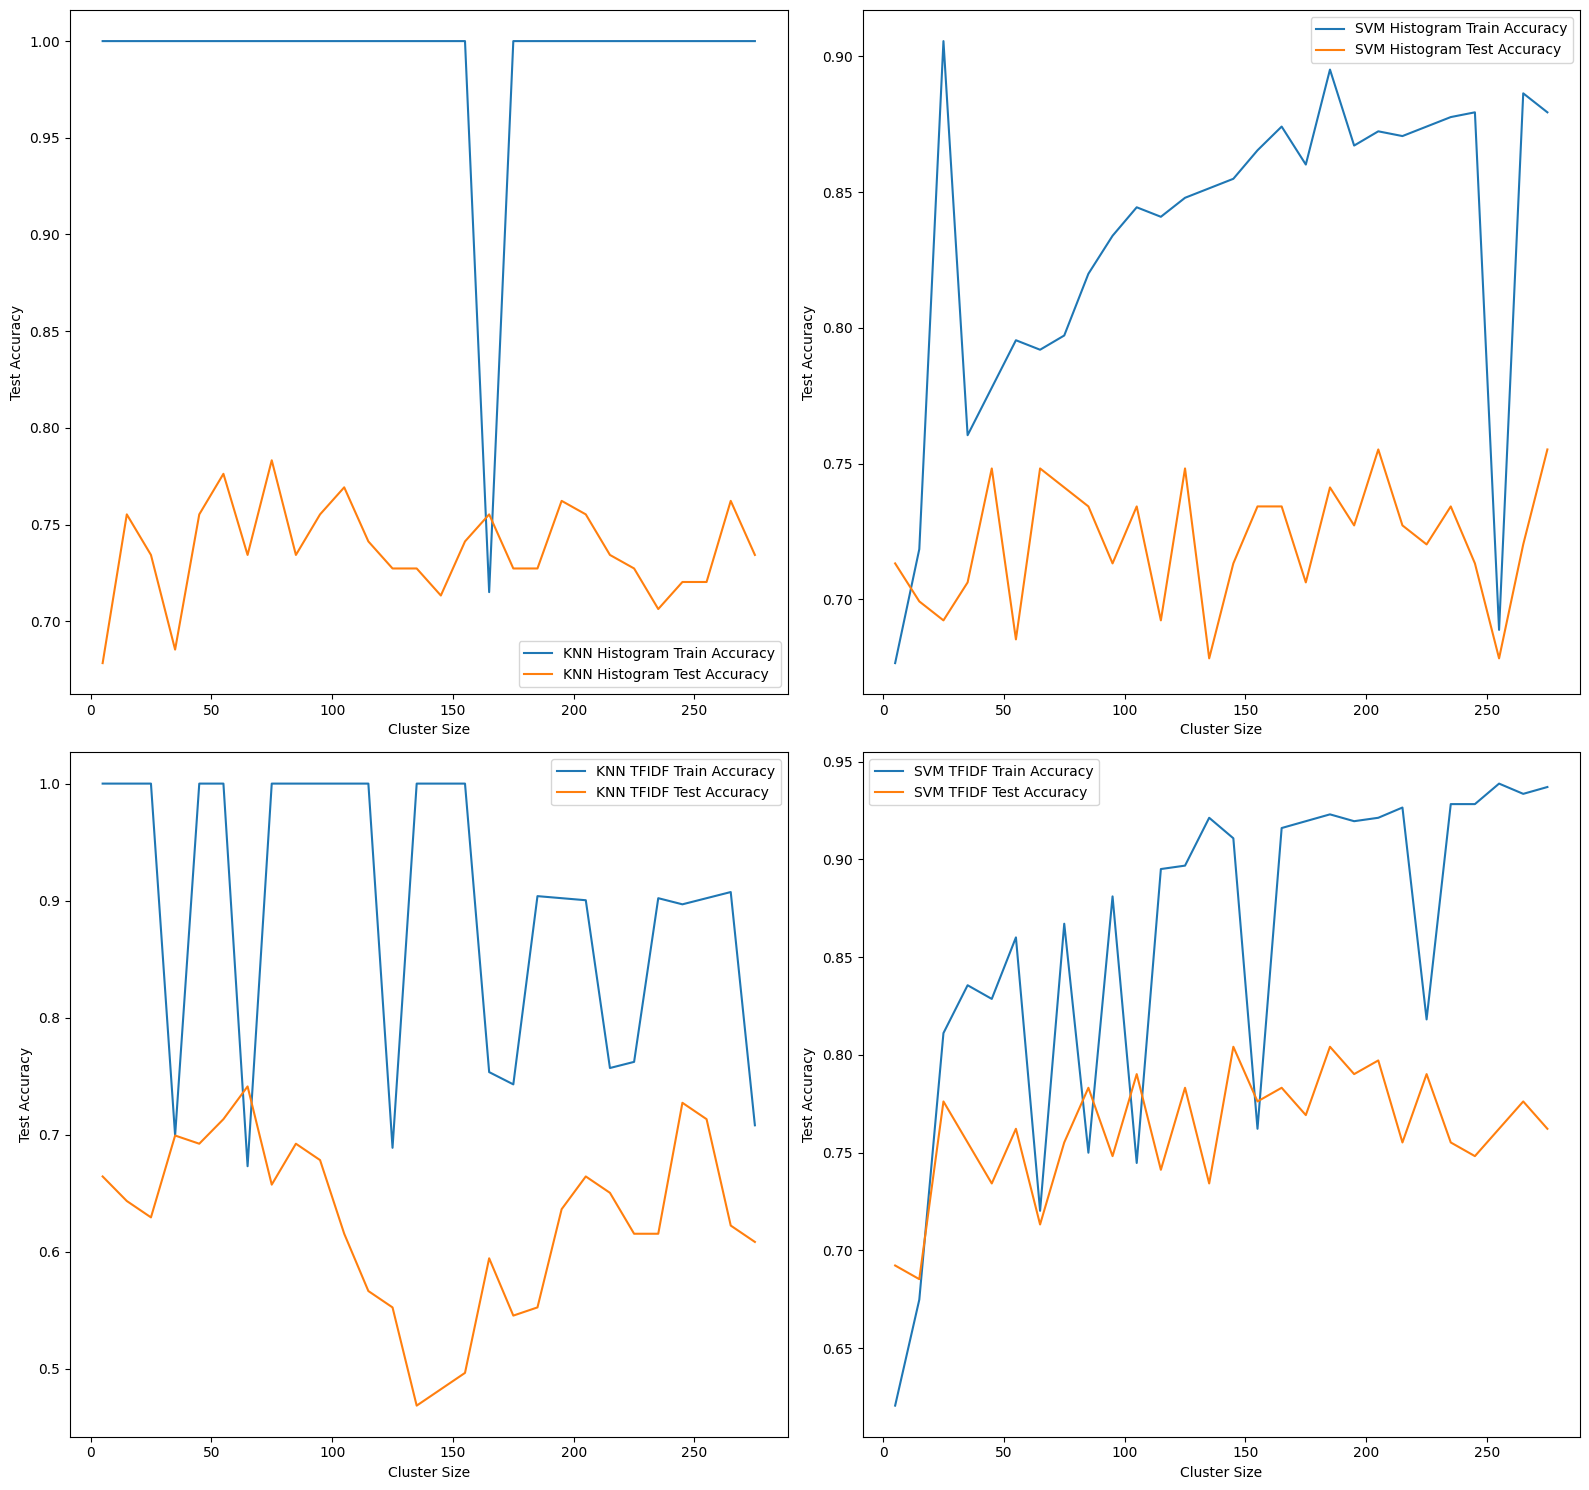

In [24]:
plt.figure(figsize=(16,15))

plt.subplot(2,2,1)
plt.plot(performance_cluster_size, KNN_Hist_Acc_Train, label="KNN Histogram Train Accuracy")
plt.plot(performance_cluster_size, KNN_Hist_Acc_Test, label="KNN Histogram Test Accuracy")
plt.xlabel("Cluster Size")
plt.ylabel("Test Accuracy")
plt.legend()

plt.subplot(2,2,2)
plt.plot(performance_cluster_size, SVM_Hist_Acc_Train, label="SVM Histogram Train Accuracy")
plt.plot(performance_cluster_size, SVM_Hist_Acc_Test, label="SVM Histogram Test Accuracy")
plt.xlabel("Cluster Size")
plt.ylabel("Test Accuracy")
plt.legend()

plt.subplot(2,2,3)
plt.plot(performance_cluster_size, KNN_TFIDF_Acc_Train, label="KNN TFIDF Train Accuracy")
plt.plot(performance_cluster_size, KNN_TFIDF_Acc_Test, label="KNN TFIDF Test Accuracy")
plt.xlabel("Cluster Size")
plt.ylabel("Test Accuracy")
plt.legend()

plt.subplot(2,2,4)
plt.plot(performance_cluster_size, SVM_TFIDF_Acc_Train, label="SVM TFIDF Train Accuracy")
plt.plot(performance_cluster_size, SVM_TFIDF_Acc_Test, label="SVM TFIDF Test Accuracy")
plt.xlabel("Cluster Size")
plt.ylabel("Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()